ExTract the Data From **MYSQL**

In [ ]:

!pip install pymysql
!pip install mysql-connector

In [ ]:
import os
import mysql.connector
import pandas as pd
import numpy as np

In [ ]:
connection=mysql.connector.connect(host = '18.136.157.135',
                                  user='dm_team',
                                  password='DM!$Team@&27920!')

In [ ]:
## Check the number of databases available on the server
cursor=connection.cursor()
cursor.execute('show databases')
for i in cursor:
    print(i)

('information_schema',)
('project_itsm',)


In [ ]:
connection=mysql.connector.connect(host='18.136.157.135',
                                  user='dm_team',
                                  password='DM!$Team@&27920!',
                                  database='project_itsm')

In [ ]:
db_tables=pd.read_sql_query('show tables',connection)
print(db_tables)

<ipython-input-110-32e13b047c9d>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  db_tables=pd.read_sql_query('show tables',connection)


  Tables_in_project_itsm
0           dataset_list


In [ ]:
query = "select * from dataset_list"
df = pd.read_sql(query,connection)
print(df.shape)
df

<ipython-input-111-ee8329852f24>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,connection)


(46606, 25)


,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,...,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,...,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,...,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,...,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4,0.23189604,...,,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1,SD0147021,,,
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4,0.805153085,...,,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1,SD0146967,,,
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5,0.917466294,...,,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1,SD0146982,,,
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4,0.701278158,...,,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1,SD0146986,,,


In [ ]:
df.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,...,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,...,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,...,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,...,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   CI_Name                     46606 non-null  object
 1   CI_Cat                      46606 non-null  object
 2   CI_Subcat                   46606 non-null  object
 3   WBS                         46606 non-null  object
 4   Incident_ID                 46606 non-null  object
 5   Status                      46606 non-null  object
 6   Impact                      46606 non-null  object
 7   Urgency                     46606 non-null  object
 8   Priority                    46606 non-null  object
 9   number_cnt                  46606 non-null  object
 10  Category                    46606 non-null  object
 11  KB_number                   46606 non-null  object
 12  Alert_Status                46606 non-null  object
 13  No_of_Reassignments         46606 non-null  ob

Import all Packages

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import itertools
import statsmodels.api as sm

**Dataset Description**

In [ ]:
df.isnull().sum()

CI_Name                       0
CI_Cat                        0
CI_Subcat                     0
WBS                           0
Incident_ID                   0
Status                        0
Impact                        0
Urgency                       0
Priority                      0
number_cnt                    0
Category                      0
KB_number                     0
Alert_Status                  0
No_of_Reassignments           0
Open_Time                     0
Reopen_Time                   0
Resolved_Time                 0
Close_Time                    0
Handle_Time_hrs               0
Closure_Code                  0
No_of_Related_Interactions    0
Related_Interaction           0
No_of_Related_Incidents       0
No_of_Related_Changes         0
Related_Change                0
dtype: int64

In [ ]:

df.describe()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
count,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,...,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606
unique,3019,13,65,274,46606,2,6,6,6,46606,...,2245,33628,34528,30639,15,50,43060,25,5,233
top,SUB000456,application,Server Based Application,WBS000073,IM0000004,Closed,4,4,4,0.601292279,...,,,02-10-2013 15:20,0,Other,1,#MULTIVALUE,,,
freq,3050,32900,18811,13342,1,46597,22556,22588,22717,1,...,44322,1780,21,236,16470,43058,3434,45384,46046,46046


In [ ]:
df['CI_Cat'].value_counts()

application             32900
subapplication           7782
computer                 3643
storage                   703
hardware                  442
software                  333
database                  214
displaydevice             212
officeelectronics         152
                          111
networkcomponents         107
applicationcomponent        5
Phone                       2
Name: CI_Cat, dtype: int64

**Preprocessing the data**

CI Category & CI Subcategory had a lot of labels which were replaced to only take the major ones. Unknown values were replaced by Mode values.

In [ ]:
df.CI_Cat.replace(['database'],'storage',inplace=True)
df.CI_Cat.replace(['applicationcomponent'],'subapplication',inplace=True)
df.CI_Cat.replace(['displaydevice','officeelectronics','Phone','networkcomponents'],'hardware',inplace=True)
df.CI_Cat.replace(np.nan,'application',inplace=True)

In [ ]:
df.shape

(46606, 25)

In [ ]:
df.CI_Subcat.replace('Desktop','Desktop Application',inplace=True)
df.CI_Subcat.replace(['Application Server','Virtual Tape Server','ESX Server','zOS Server','Neoview Server','X86 Server',
                       'Unix Server','Oracle Server','Windows Server in extern beheer','Thin Client','NonStop Server',
                       'Number','Windows Server','Linux Server',np.nan,'SharePoint Farm','Lines'],
                       'Server Based Application',inplace=True)
df.CI_Subcat.replace('RAC Service','Banking Device',inplace=True)
df.CI_Subcat.replace(['Iptelephony','Protocol','Net Device','IPtelephony','ESX Cluster','Standard Application'],
                       'Web Based Application',inplace=True)
df.CI_Subcat.replace(['VMWare','Security Software','zOS Systeem','Firewall','Database Software','VDI','Instance',
                       'MQ Queue Manager','Automation Software','Citrix','SAP','Encryption'],'System Software',inplace=True)
df.CI_Subcat.replace(['UPS','Omgeving'],'Client Based Application',inplace=True)
df.CI_Subcat.replace(['NonStop Storage','NonStop Harddisk','Tape Library','zOS Cluster','DataCenterEquipment',
                       'MigratieDummy'],'Database',inplace=True)
df.CI_Subcat.replace(['Modem','Router'],'Network Component',inplace=True)
df.CI_Subcat.replace('KVM Switches','Switch',inplace=True)

Create data Set.And Drop unecessary Column

In [ ]:
X = df.loc[:,['CI_Cat','CI_Subcat','WBS','Category']]
y = df.Priority

In [ ]:
X.head()

,CI_Cat,CI_Subcat,WBS,Category
0,subapplication,Web Based Application,WBS000162,incident
1,application,Web Based Application,WBS000088,incident
2,application,Desktop Application,WBS000092,request for information
3,application,Web Based Application,WBS000088,incident
4,application,Web Based Application,WBS000088,incident


In [ ]:
# Label Encoding
le= LabelEncoder()
for i in (0,1,2,3):
    X.iloc[:,i] = le.fit_transform(X.iloc[:,i])

<ipython-input-123-00ac6d948fb7>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.iloc[:,i] = le.fit_transform(X.iloc[:,i])
<ipython-input-123-00ac6d948fb7>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.iloc[:,i] = le.fit_transform(X.iloc[:,i])
<ipython-input-123-00ac6d948fb7>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(

In [ ]:
# Splitting the data into test and train for calculating accuracy
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

Feature Selection

In [ ]:
# Standardization technique
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Building different Models**

**Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
rbf_svc = SVC(kernel='rbf',C=10,gamma=0.1).fit(X_train,y_train)

In [ ]:
# Predicting the model
y_predict_svm = rbf_svc.predict(X_test)

In [ ]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_svm))
print(classification_report(y_test,y_predict_svm))

0.7296524102417393


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.50      0.65      0.56       210
           3       0.53      0.33      0.41      1581
           4       0.70      0.90      0.79      6829
           5       0.87      0.68      0.76      4936
          NA       0.00      0.00      0.00       425

    accuracy                           0.73     13982
   macro avg       0.43      0.43      0.42     13982
weighted avg       0.72      0.73      0.71     13982



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion_matrix(y_test,y_predict_svm)

array([[   0,    0,    0,    1,    0,    0],
       [   0,  137,    9,   55,    9,    0],
       [   0,   36,  529,  914,  102,    0],
       [   0,   80,  201, 6162,  386,    0],
       [   0,   10,  112, 1440, 3374,    0],
       [   0,   12,  144,  253,   16,    0]])

** Decision Tree**


In [ ]:
# Training the model
from sklearn.tree import DecisionTreeClassifier
model_dtree=DecisionTreeClassifier()
model_dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
# Predicting the model
y_predict_dtree = model_dtree.predict(X_test)

In [ ]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_dtree))
print(classification_report(y_test,y_predict_dtree))

0.8088256329566585


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.52      0.69      0.59       210
           3       0.66      0.64      0.65      1581
           4       0.81      0.91      0.85      6829
           5       0.88      0.80      0.84      4936
          NA       0.00      0.00      0.00       425

    accuracy                           0.81     13982
   macro avg       0.48      0.51      0.49     13982
weighted avg       0.79      0.81      0.80     13982



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion_matrix(y_test,y_predict_dtree)

array([[   0,    0,    0,    1,    0,    0],
       [   0,  144,    6,   43,   17,    0],
       [   0,   43, 1010,  408,  120,    0],
       [   0,   68,  202, 6194,  365,    0],
       [   0,   12,   55,  908, 3961,    0],
       [   0,   12,  268,  118,   27,    0]])

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_LR=LogisticRegression()
model_LR.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Predicting the model
y_predict_LR = model_LR.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_predict_LR))
print(classification_report(y_test,y_predict_LR))

0.6419682448862823


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00       210
           3       0.00      0.00      0.00      1581
           4       0.59      0.96      0.73      6829
           5       0.82      0.50      0.62      4936
          NA       0.00      0.00      0.00       425

    accuracy                           0.64     13982
   macro avg       0.23      0.24      0.22     13982
weighted avg       0.58      0.64      0.58     13982



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion_matrix(y_test,y_predict_LR)


array([[   0,    0,    0,    1,    0,    0],
       [   0,    0,    0,   66,  144,    0],
       [   0,    0,    0, 1491,   90,    0],
       [   0,    0,    0, 6531,  298,    0],
       [   0,    0,    0, 2491, 2445,    0],
       [   0,    0,    0,  403,   22,    0]])

**Random Forest**

In [ ]:
# Training the model
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(max_depth=27)
model_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=27)

In [ ]:
# Predicting the model
y_predict_rf = model_rf.predict(X_test)

In [ ]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_rf))
print(classification_report(y_test,y_predict_rf))

0.8085395508510943


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.52      0.66      0.59       210
           3       0.65      0.64      0.65      1581
           4       0.81      0.91      0.85      6829
           5       0.88      0.80      0.84      4936
          NA       0.00      0.00      0.00       425

    accuracy                           0.81     13982
   macro avg       0.48      0.50      0.49     13982
weighted avg       0.79      0.81      0.80     13982



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion_matrix(y_test,y_predict_rf)

array([[   0,    0,    0,    1,    0,    0],
       [   0,  139,   10,   44,   17,    0],
       [   0,   37, 1008,  411,  122,    3],
       [   0,   66,  202, 6194,  366,    1],
       [   0,   11,   53,  908, 3964,    0],
       [   0,   12,  268,  118,   27,    0]])

**K-Nearest Neighbor**

In [ ]:
# Training the model
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=12,metric='euclidean') # Maximum accuracy for n=10
model_knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=12)

In [ ]:
# Predicting the model
y_predict_knn = model_knn.predict(X_test)

In [ ]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_knn))
print(classification_report(y_test,y_predict_knn))

0.8001716492633386


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.52      0.66      0.58       210
           3       0.59      0.66      0.62      1581
           4       0.80      0.90      0.85      6829
           5       0.90      0.78      0.83      4936
          NA       0.29      0.00      0.01       425

    accuracy                           0.80     13982
   macro avg       0.52      0.50      0.48     13982
weighted avg       0.79      0.80      0.79     13982



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion_matrix(y_test,y_predict_knn)

array([[   0,    0,    0,    1,    0,    0],
       [   0,  138,   10,   43,   19,    0],
       [   0,   37, 1041,  377,  121,    5],
       [   0,   68,  307, 6179,  275,    0],
       [   0,   10,  108,  990, 3828,    0],
       [   0,   11,  286,  103,   23,    2]])

**XGBoost Classifier**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [ ]:
# Training the model
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
# Predicting the model
y_predict_xgb = model_xgb.predict(X_test)

In [ ]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_xgb))
print(classification_report(y_test,y_predict_xgb))

0.8081819482191389
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.53      0.67      0.59       210
           2       0.66      0.63      0.64      1581
           3       0.81      0.91      0.85      6829
           4       0.88      0.80      0.84      4936
           5       0.00      0.00      0.00       425

    accuracy                           0.81     13982
   macro avg       0.48      0.50      0.49     13982
weighted avg       0.79      0.81      0.79     13982



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Based on the above al models we come to a conclusion that the Random Forest
is the best model for the given ITSM classification Problem.

**Predicting Request For Change**

**Feature Selection**

In [ ]:
# Selecting the predictors
X1 = df.loc[:,['CI_Subcat','WBS','Priority','Category','No_of_Related_Interactions','No_of_Related_Incidents']]
y1 = df.No_of_Related_Changes

In [ ]:
X1.head()

,CI_Subcat,WBS,Priority,Category,No_of_Related_Interactions,No_of_Related_Incidents
0,Web Based Application,WBS000162,4,incident,1,2
1,Web Based Application,WBS000088,3,incident,1,1
2,Desktop Application,WBS000092,NA,request for information,1,
3,Web Based Application,WBS000088,4,incident,1,
4,Web Based Application,WBS000088,4,incident,1,


In [ ]:
lm= LabelEncoder()
for i in (0,1,2,3,4,5):
    X1.iloc[:,i] = lm.fit_transform(X1.iloc[:,i])

<ipython-input-153-8bebeb92a4f2>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X1.iloc[:,i] = lm.fit_transform(X1.iloc[:,i])
<ipython-input-153-8bebeb92a4f2>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X1.iloc[:,i] = lm.fit_transform(X1.iloc[:,i])
<ipython-input-153-8bebeb92a4f2>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.iseti

In [ ]:
# Splitting into train and test for calculating the accuracy
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.3,random_state=10)

In [ ]:
X1_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32624 entries, 37182 to 17673
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   CI_Subcat                   32624 non-null  int64
 1   WBS                         32624 non-null  int64
 2   Priority                    32624 non-null  int64
 3   Category                    32624 non-null  int64
 4   No_of_Related_Interactions  32624 non-null  int64
 5   No_of_Related_Incidents     32624 non-null  int64
dtypes: int64(6)
memory usage: 1.7 MB


In [ ]:
# Standardization technique is used
sc = StandardScaler()
X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform(X1_test)

In [ ]:
X1_train.shape


(32624, 6)

In [ ]:
X1_test.shape

(13982, 6)

**Models**

**Decision Tree**

In [ ]:
# Training the model
from sklearn.tree import DecisionTreeClassifier
model1_dtree=DecisionTreeClassifier()
model1_dtree.fit(X1_train,y1_train)

DecisionTreeClassifier()

In [ ]:
# Predicting the model
y1_predict_dtree = model1_dtree.predict(X1_test)

In [ ]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y1_test,y1_predict_dtree))
print(classification_report(y1_test,y1_predict_dtree))

0.9880560720926906


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

                   0.99      1.00      0.99     13835
           1       0.17      0.04      0.06       138
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         1

    accuracy                           0.99     13982
   macro avg       0.29      0.26      0.26     13982
weighted avg       0.98      0.99      0.98     13982



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion_matrix(y1_test,y1_predict_dtree)


array([[13810,    25,     0,     0],
       [  133,     5,     0,     0],
       [    8,     0,     0,     0],
       [    1,     0,     0,     0]])

**Random Forest**

In [ ]:
# Training the model
from sklearn.ensemble import RandomForestClassifier
model1_rf = RandomForestClassifier()
model1_rf.fit(X1_train,y1_train)

RandomForestClassifier()

In [ ]:
# Predicting the model
y1_predict_rf = model1_rf.predict(X1_test)

In [ ]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y1_test,y1_predict_rf))
print(classification_report(y1_test,y1_predict_rf))

0.9885567157774281


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

                   0.99      1.00      0.99     13835
           1       0.12      0.01      0.03       138
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         1

    accuracy                           0.99     13982
   macro avg       0.28      0.25      0.26     13982
weighted avg       0.98      0.99      0.98     13982



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion_matrix(y1_test,y1_predict_rf)

array([[13820,    15,     0,     0],
       [  136,     2,     0,     0],
       [    8,     0,     0,     0],
       [    1,     0,     0,     0]])

**Forecasting the Incident Volume**

In [ ]:
FIV = df.loc[:,['Incident_ID','Open_Time']]

In [ ]:
FIV.head(2)

,Incident_ID,Open_Time
0,IM0000004,05-02-2012 13:32
1,IM0000005,12-03-2012 15:44


In [ ]:
Open=[]

In [ ]:
for i in range(len(FIV.Open_Time)):
    if (FIV.Open_Time[i][1]=='/'):
        FIV.Open_Time[i] = dt.datetime.strptime(FIV.Open_Time[i],'%d/%m/%Y %H:%M').date()
    elif (FIV.Open_Time[i][2]=='/'):
        FIV.Open_Time[i] = dt.datetime.strptime(FIV.Open_Time[i],'%d/%m/%Y %H:%M').date()
    else:
        FIV.Open_Time[i] = dt.datetime.strptime(FIV.Open_Time[i],'%d-%m-%Y %H:%M').date()

In [ ]:
FIV.head(2)

,Incident_ID,Open_Time
0,IM0000004,2012-02-05
1,IM0000005,2012-03-12


In [ ]:
# Adding a new column which will have the number of tickets per day
FIV['No_Incidents'] = FIV.groupby('Open_Time')['Incident_ID'].transform('count')

In [ ]:
FIV.drop(['Incident_ID'],axis=1,inplace=True)
FIV.drop_duplicates(inplace=True)

In [ ]:
FIV.head(2)

,Open_Time,No_Incidents
0,2012-02-05,1
1,2012-03-12,1


In [ ]:
# Setting Date as the Index
FIV = FIV.set_index('Open_Time')
FIV.index = pd.to_datetime(FIV.index)
FIV.index

DatetimeIndex(['2012-02-05', '2012-03-12', '2012-03-29', '2012-07-17',
               '2012-08-10', '2012-08-15', '2012-08-22', '2012-08-29',
               '2012-09-03', '2012-09-21',
               ...
               '2014-03-22', '2014-03-24', '2014-03-23', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=331, freq=None)

In [ ]:
# Making a new Series with frequency as Day
df1 = FIV['No_Incidents']
df1 = df1.asfreq('D')
df1.index

DatetimeIndex(['2012-02-05', '2012-02-06', '2012-02-07', '2012-02-08',
               '2012-02-09', '2012-02-10', '2012-02-11', '2012-02-12',
               '2012-02-13', '2012-02-14',
               ...
               '2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=786, freq='D')

In [ ]:
df1.head()

Open_Time
2012-02-05    1.0
2012-02-06    NaN
2012-02-07    NaN
2012-02-08    NaN
2012-02-09    NaN
Freq: D, Name: No_Incidents, dtype: float64

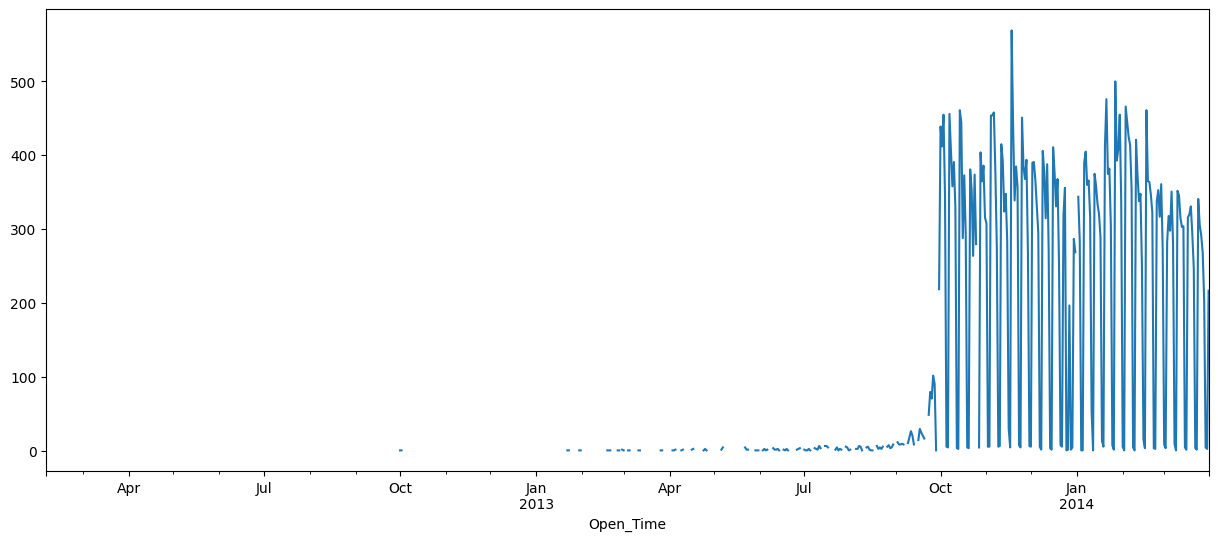

In [ ]:
# Plotting number of tickets per day
df1.plot(figsize=(15,6))
plt.show()

In [ ]:
# we will Consider Feb Oct 2013
FIV2013 = FIV[FIV.index > dt.datetime(2013,10,1)]

In [ ]:
FIV2013.head()

,No_Incidents
Open_Time,
2013-10-02,412
2013-10-03,455
2013-10-04,345
2013-10-07,456
2013-10-05,6


In [ ]:
# new Dataset
df2 = FIV2013['No_Incidents']
df2 = df2.asfreq('D')
df2.index

DatetimeIndex(['2013-10-02', '2013-10-03', '2013-10-04', '2013-10-05',
               '2013-10-06', '2013-10-07', '2013-10-08', '2013-10-09',
               '2013-10-10', '2013-10-11',
               ...
               '2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=181, freq='D')

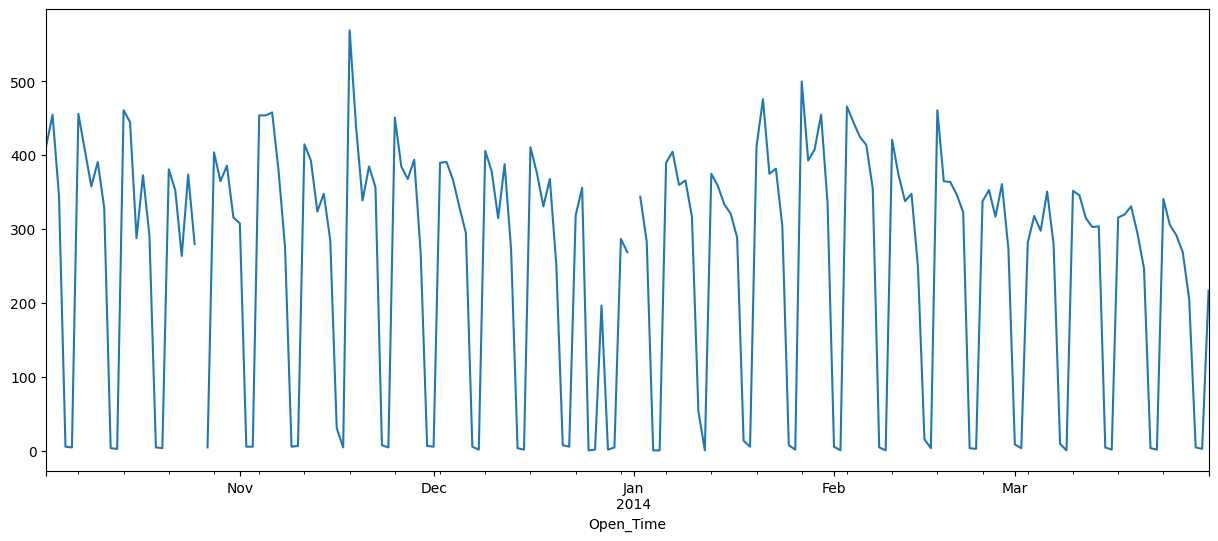

In [ ]:
# Plotting number of tickets per day after October 2013
df2.plot(figsize=(15,6))
plt.show()

In [ ]:
# Making a list of values for p,d & q
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))

In [ ]:
# Checking the AIC values per pairs
for param in pdq:
    mod = sm.tsa.statespace.SARIMAX(df2,order=param,enforce_stationarity=False,enforce_invertibility=False)
    results = mod.fit()
    print('ARIMA{} - AIC:{}'.format(param, results.aic))

ARIMA(0, 0, 0) - AIC:2539.6180293605685
ARIMA(0, 0, 1) - AIC:2373.7853824722597
ARIMA(0, 1, 0) - AIC:2371.128960804689
ARIMA(0, 1, 1) - AIC:2313.136333818443
ARIMA(1, 0, 0) - AIC:2365.291646936565
ARIMA(1, 0, 1) - AIC:2337.3125086933524
ARIMA(1, 1, 0) - AIC:2373.128068065154
ARIMA(1, 1, 1) - AIC:2294.4315812436553


In [ ]:
# Choosing the model with minimum AIC and the ARIMA Model for Time Series Forecasting
mod = sm.tsa.statespace.SARIMAX(df2,order=(1,1,1))
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3386      0.090      3.771      0.000       0.163       0.515
ma.L1         -0.9989      0.428     -2.332      0.020      -1.839      -0.159
sigma2       2.52e+04   9781.762      2.576      0.010    6023.453    4.44e+04


In [ ]:
# Checking range of dates for our values
print(FIV.index.min(),'to',FIV.index.max())

2012-02-05 00:00:00 to 2014-03-31 00:00:00


In [ ]:
# Predicting the future values and the confidence interval
pred = results.get_prediction(start=pd.to_datetime('2014-3-31'),end=pd.to_datetime('2014-10-30'),dynamic=False)
pred_ci = pred.conf_int()
pred.predicted_mean.round()

2014-03-31    167.0
2014-04-01    240.0
2014-04-02    248.0
2014-04-03    250.0
2014-04-04    251.0
              ...  
2014-10-26    252.0
2014-10-27    252.0
2014-10-28    252.0
2014-10-29    252.0
2014-10-30    252.0
Freq: D, Name: predicted_mean, Length: 214, dtype: float64

**Visualization**

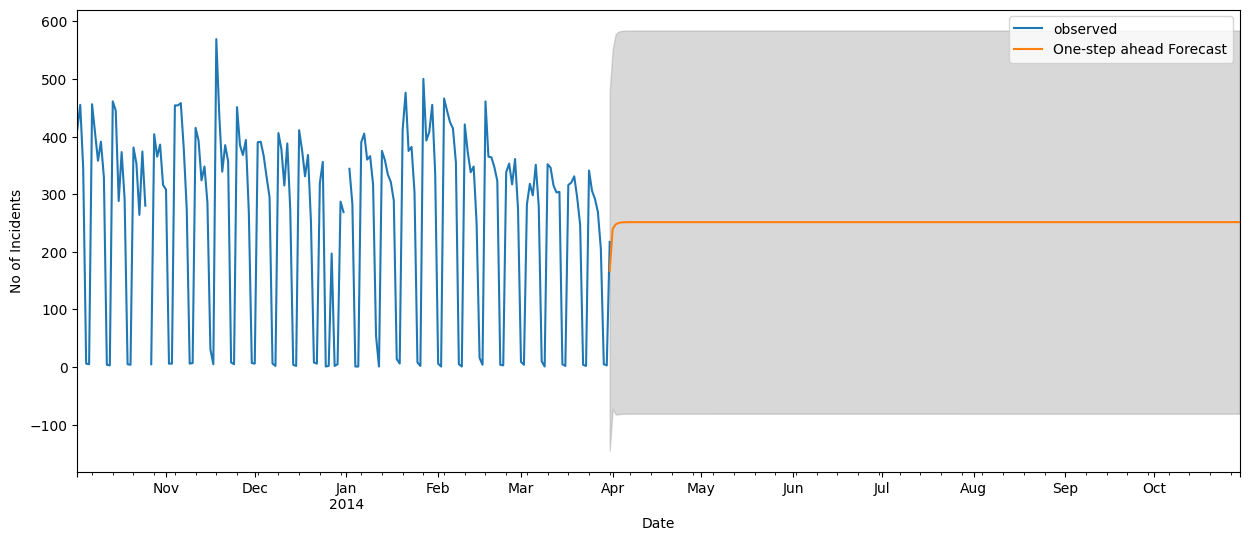

In [ ]:
ax = df2['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='One-step ahead Forecast',figsize=(15, 6))
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='grey',alpha=0.3)
ax.set_xlabel('Date')
ax.set_ylabel('No of Incidents')
plt.legend()
plt.show()